# Librairy

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

# Data

In [128]:
df = pd.read_csv('../data/combined_data.csv')

In [79]:
df

,title,text,subject,date,label,title_normalized,text_normalized,year,month,day_of_week,day_of_month,week_of_year,title_chunks
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Fake,"['donald', 'trump', 'sends', 'embarrass', 'new...","['donald', 'trump', 'wish', 'american', 'happy...",2017.0,12.0,6.0,31.0,52.0,"['donald trump sends', 'new year', 'message di..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Fake,"['drunk', 'bragging', 'trump', 'staffer', 'sta...","['house', 'intelligence', 'committee', 'chairm...",2017.0,12.0,6.0,31.0,52.0,"['drunk', 'trump staffer start', 'russian coll..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Fake,"['sheriff', 'david', 'clarke', 'becomes', 'int...","['friday', 'reveal', 'former', 'milwaukee', 's...",2017.0,12.0,5.0,30.0,52.0,"['sheriff david clarke', 'internet joke', 'pok..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Fake,"['trump', 'obsess', 'even', 'obama', 'name', '...","['christmas', 'day', 'donald', 'trump', 'annou...",2017.0,12.0,4.0,29.0,52.0,"['trump', 'obama name cod', 'website image']"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Fake,"['pope', 'francis', 'call', 'donald', 'trump',...","['pope', 'francis', 'use', 'annual', 'christma...",2017.0,12.0,0.0,25.0,52.0,['pope francis call donald trump christmas spe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,True,"['fully', 'commit', 'nato', 'back', 'new', 'ap...","['brussels', 'reuters', 'nato', 'ally', 'tuesd...",2017.0,8.0,1.0,22.0,34.0,['new approach afghanistan']
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,True,"['lexisnexis', 'withdrew', 'two', 'product', '...","['london', 'reuters', 'lexisnexis', 'provider'...",2017.0,8.0,1.0,22.0,34.0,"['product', 'chinese market']"
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,True,"['minsk', 'cultural', 'hub', 'becomes', 'autho...","['minsk', 'reuters', 'shadow', 'disused', 'sov...",2017.0,8.0,1.0,22.0,34.0,"['minsk cultural hub', 'authority']"
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,True,"['vatican', 'upbeat', 'possibility', 'pope', '...","['moscow', 'reuters', 'vatican', 'secretary', ...",2017.0,8.0,1.0,22.0,34.0,"['vatican upbeat possibility pope', 'francis v..."


# EDA

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11172 entries, 0 to 11171
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             11172 non-null  object 
 1   text              11172 non-null  object 
 2   subject           11172 non-null  object 
 3   date              8292 non-null   object 
 4   label             11172 non-null  object 
 5   title_normalized  11172 non-null  object 
 6   text_normalized   11172 non-null  object 
 7   year              8292 non-null   float64
 8   month             8292 non-null   float64
 9   day_of_week       8292 non-null   float64
 10  day_of_month      8292 non-null   float64
 11  week_of_year      8292 non-null   float64
 12  title_chunks      11172 non-null  object 
 13  title_word_count  11172 non-null  int64  
 14  text_word_count   11172 non-null  int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 1.3+ MB


## stat Title and Text

In [81]:
data['title_word_count'] = data['title'].apply(lambda x: len(x.split()))
data['text_word_count'] = data['text'].apply(lambda x: len(x.split()))

title_stats = data.groupby('label')['title_word_count'].describe()
text_stats = data.groupby('label')['text_word_count'].describe()

title_stats

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Fake,5942.0,14.685291,4.361919,1.0,12.0,14.0,17.0,42.0
True,5230.0,9.968834,1.714233,4.0,9.0,10.0,11.0,17.0


In [101]:
text_stats

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Fake,5942.0,420.120666,394.861203,0.0,244.0,366.0,506.0,8135.0
True,5230.0,386.584895,278.653373,22.0,147.0,361.0,529.0,5172.0


## Distribution Title, Text

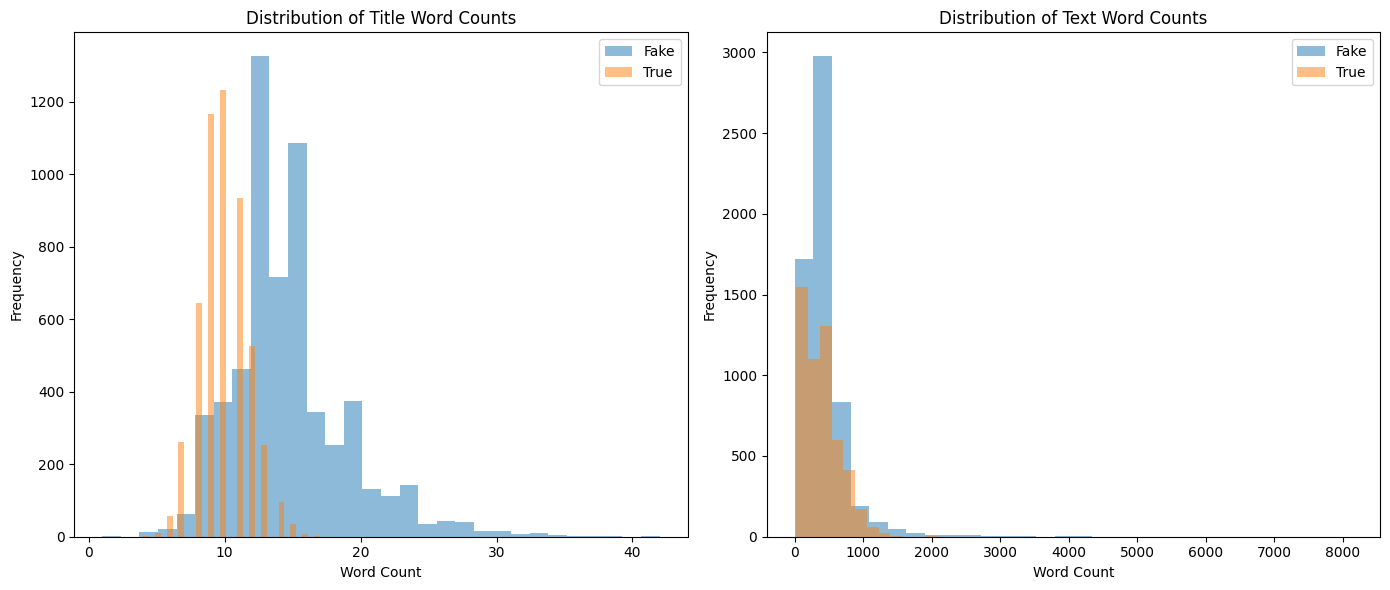

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Title word count distribution
axes[0].hist(data[data['label'] == 'Fake']['title_word_count'], bins=30, alpha=0.5, label='Fake')
axes[0].hist(data[data['label'] == 'True']['title_word_count'], bins=30, alpha=0.5, label='True')
axes[0].set_title('Distribution of Title Word Counts')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Text word count distribution
axes[1].hist(data[data['label'] == 'Fake']['text_word_count'], bins=30, alpha=0.5, label='Fake')
axes[1].hist(data[data['label'] == 'True']['text_word_count'], bins=30, alpha=0.5, label='True')
axes[1].set_title('Distribution of Text Word Counts')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

## Distribution Subject

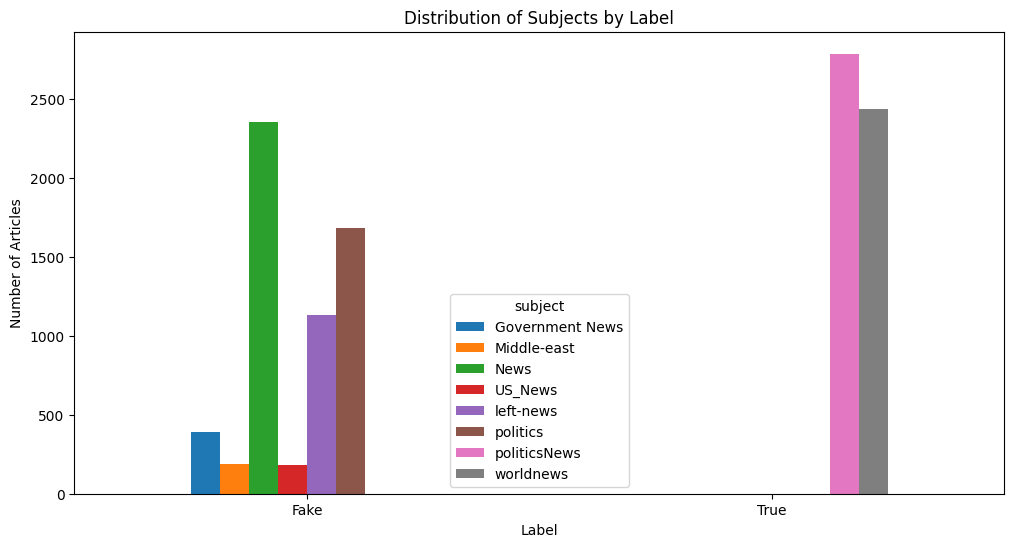

subject,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
label,,,,,,,,
Fake,394,189,2354,185,1133,1687,0,0
True,0,0,0,0,0,0,2789,2441


In [103]:
subject_distribution = data.groupby(['label', 'subject']).size().unstack(fill_value=0)

# Visualize the distribution of subjects across labels
subject_distribution.plot(kind='bar', figsize=(12, 6), title='Distribution of Subjects by Label')
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

subject_distribution

## Correlation

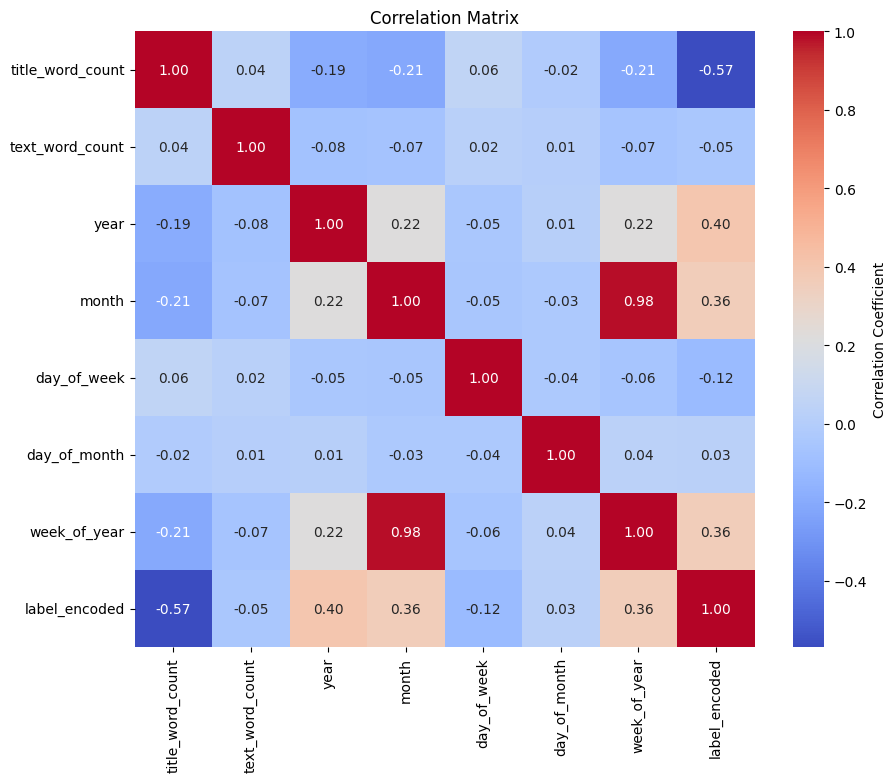

In [104]:
data['label_encoded'] = data['label'].apply(lambda x: 1 if x == 'True' else 0)

numeric_columns = ['title_word_count', 'text_word_count', 'year', 'month', 'day_of_week', 'day_of_month', 'week_of_year', 'label_encoded']

correlation_matrix = data[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()


## Trend temporel

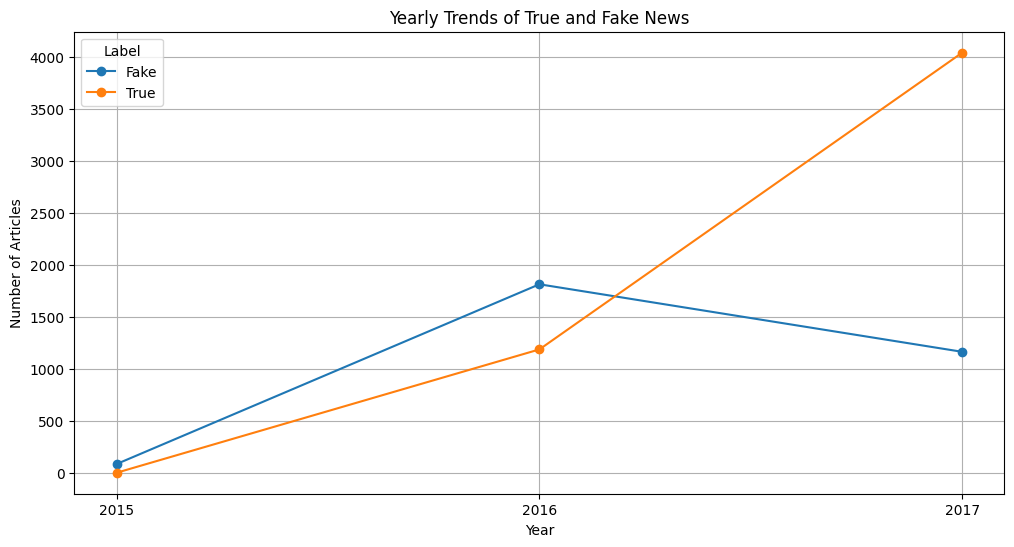

label,Fake,True
year,,
2015.0,84,0
2016.0,1814,1187
2017.0,1164,4043


In [105]:
yearly_trends = data.groupby(['year', 'label']).size().unstack(fill_value=0)

yearly_trends.plot(kind='line', marker='o', figsize=(12, 6), title='Yearly Trends of True and Fake News')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(yearly_trends.index)
plt.grid(True)
plt.legend(title='Label')
plt.show()

yearly_trends

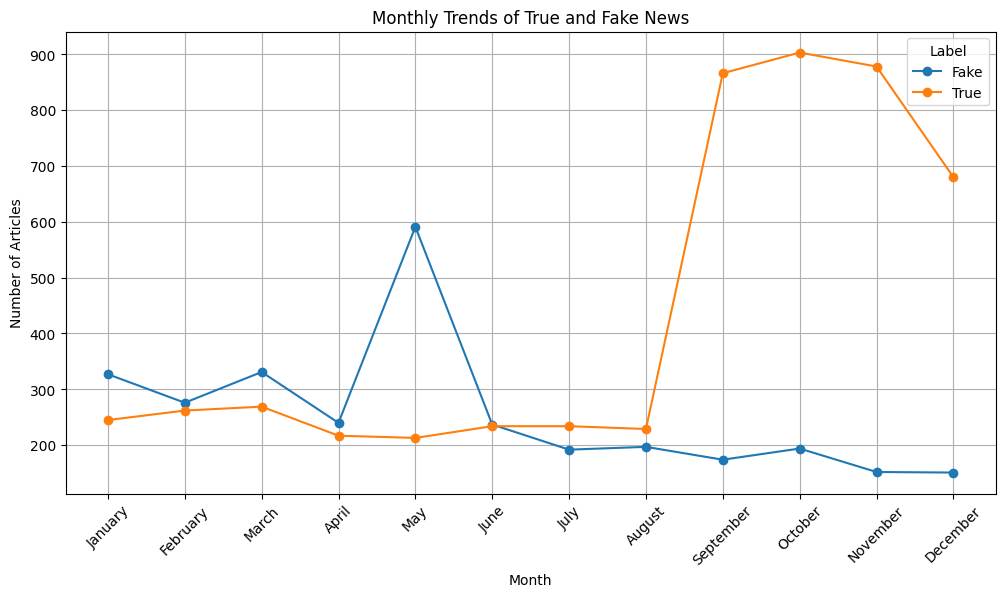

label,Fake,True
month,,
1.0,327,245
2.0,276,262
3.0,331,269
4.0,240,217
5.0,591,213
6.0,237,234
7.0,192,234
8.0,197,229
9.0,174,866


In [106]:
monthly_trends = data.groupby(['month', 'label']).size().unstack(fill_value=0)

monthly_trends.plot(kind='line', marker='o', figsize=(12, 6), title='Monthly Trends of True and Fake News')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(monthly_trends.index, labels=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], rotation=45)
plt.grid(True)
plt.legend(title='Label')
plt.show()

monthly_trends

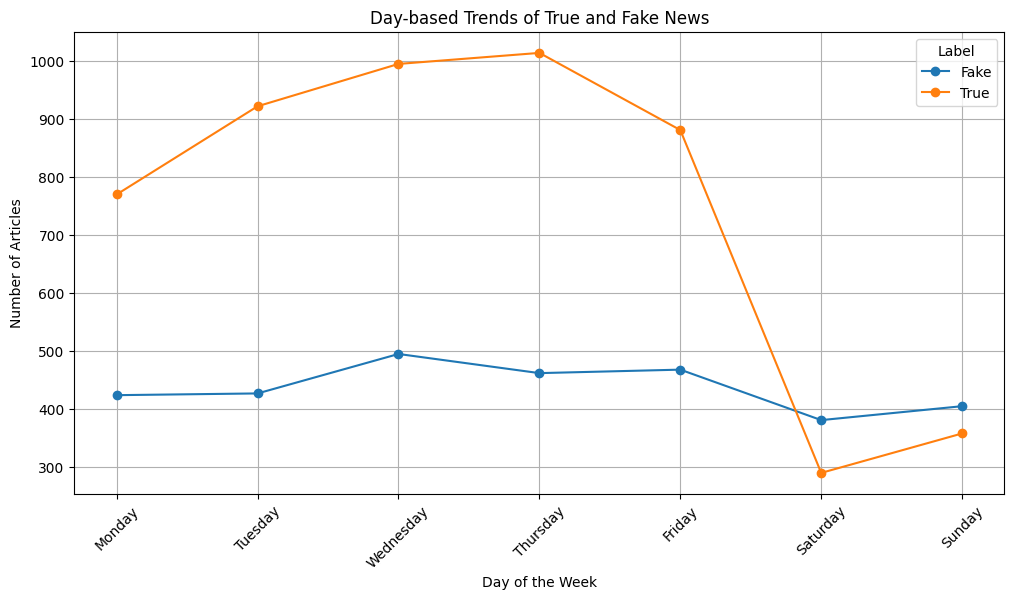

label,Fake,True
day_of_week,,
0.0,424,770
1.0,427,922
2.0,495,995
3.0,462,1014
4.0,468,881
5.0,381,290
6.0,405,358


In [107]:
day_trends = data.groupby(['day_of_week', 'label']).size().unstack(fill_value=0)

# Visualize the day-based trends of 'True' and 'Fake' news
day_trends.plot(kind='line', marker='o', figsize=(12, 6), title='Day-based Trends of True and Fake News')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(day_trends.index, labels=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
], rotation=45)
plt.grid(True)
plt.legend(title='Label')
plt.show()

day_trends

## Text lenght

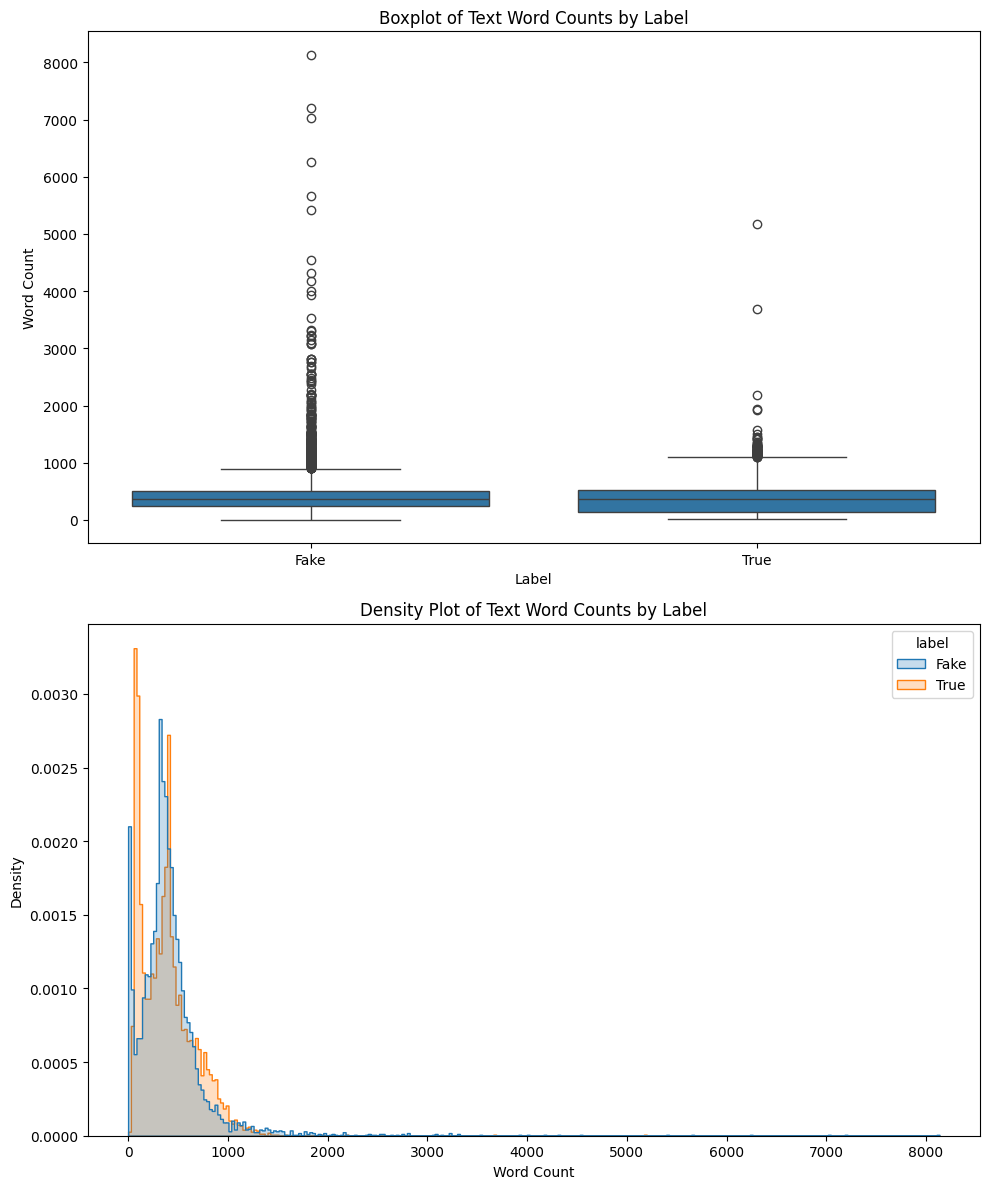

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Boxplot for text word count by label
sns.boxplot(x='label', y='text_word_count', data=data, ax=axes[0])
axes[0].set_title('Boxplot of Text Word Counts by Label')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Word Count')

# Distribution of text word count for more detailed visualization
sns.histplot(data=data, x='text_word_count', hue='label', element='step', stat='density', common_norm=False, ax=axes[1])
axes[1].set_title('Density Plot of Text Word Counts by Label')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


## Analyse de sentiment

In [110]:
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

data_sample = data.sample(n=100, random_state=1)  
data_sample['polarity'], data_sample['subjectivity'] = zip(*data_sample['text'].map(calculate_sentiment))

data_sample[['text', 'polarity', 'subjectivity']].head()

,text,polarity,subjectivity
3188,The expectations were high for Ivanka Trump s ...,0.420000,0.763333
1332,"Ann Coulter, throughout her seemingly long car...",0.059635,0.280990
7094,WASHINGTON (Reuters) - Democrat Hillary Clinto...,0.083497,0.447114
5829,WASHINGTON (Reuters) - Democratic presidential...,0.190000,0.284444
10884,BARCELONA (Reuters) - Catalonia will apply a r...,-0.083333,0.450000


In [111]:
data['polarity'], data['subjectivity'] = zip(*data['text'].map(calculate_sentiment))

polarity_stats = data.groupby('label')['polarity'].describe()
subjectivity_stats = data.groupby('label')['subjectivity'].describe()

polarity_stats, subjectivity_stats

(        count      mean       std  min       25%       50%       75%       max
 label                                                                         
 Fake   5942.0  0.058899  0.116945 -1.0  0.000000  0.055863  0.113342  1.000000
 True   5230.0  0.053597  0.089575 -0.8  0.001568  0.051470  0.101047  0.628571,
         count      mean       std  min       25%       50%       75%  max
 label                                                                    
 Fake   5942.0  0.434033  0.138499  0.0  0.382010  0.445454  0.506713  1.0
 True   5230.0  0.358404  0.114320  0.0  0.299075  0.366125  0.424895  1.0)

## analyse de complexité de texte

In [113]:
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Sample data for fake and true news
fake_news_sample = data[data['label'] == 'Fake']['text'].sample(n=100, random_state=1)
true_news_sample = data[data['label'] == 'True']['text'].sample(n=100, random_state=1)

# Get top 10 bi-grams and tri-grams
top_bi_grams_fake = get_top_ngrams(fake_news_sample, n=10, ngram_range=(2, 2))
top_tri_grams_fake = get_top_ngrams(fake_news_sample, n=10, ngram_range=(3, 3))
top_bi_grams_true = get_top_ngrams(true_news_sample, n=10, ngram_range=(2, 2))
top_tri_grams_true = get_top_ngrams(true_news_sample, n=10, ngram_range=(3, 3))

In [114]:
top_bi_grams_fake

[('donald trump', 74),
 ('featured image', 41),
 ('united states', 40),
 ('hillary clinton', 28),
 ('twitter com', 26),
 ('pic twitter', 24),
 ('getty images', 23),
 ('january 2017', 23),
 ('president obama', 21),
 ('2017 realdonaldtrump', 21)]

In [115]:
top_tri_grams_fake

[('pic twitter com', 24),
 ('january 2017 realdonaldtrump', 21),
 ('taxpayer funded abortion', 12),
 ('funded abortion demand', 12),
 ('2017 realdonaldtrump kellyannepolls', 9),
 ('amnesty illegal aliens', 8),
 ('donald trump realdonaldtrump', 6),
 ('world war ii', 6),
 ('social welfare programs', 6),
 ('access taxpayer funded', 6)]

In [116]:
top_bi_grams_true

[('north korea', 80),
 ('united states', 76),
 ('donald trump', 50),
 ('white house', 46),
 ('washington reuters', 37),
 ('president donald', 35),
 ('said statement', 23),
 ('told reporters', 22),
 ('prime minister', 21),
 ('trump said', 20)]

In [117]:
top_tri_grams_true

[('president donald trump', 35),
 ('president barack obama', 13),
 ('leader mitch mcconnell', 10),
 ('vice president mike', 9),
 ('president mike pence', 9),
 ('white house said', 9),
 ('said united states', 7),
 ('papua new guinea', 6),
 ('nuclear missile programs', 6),
 ('senate majority leader', 6)]

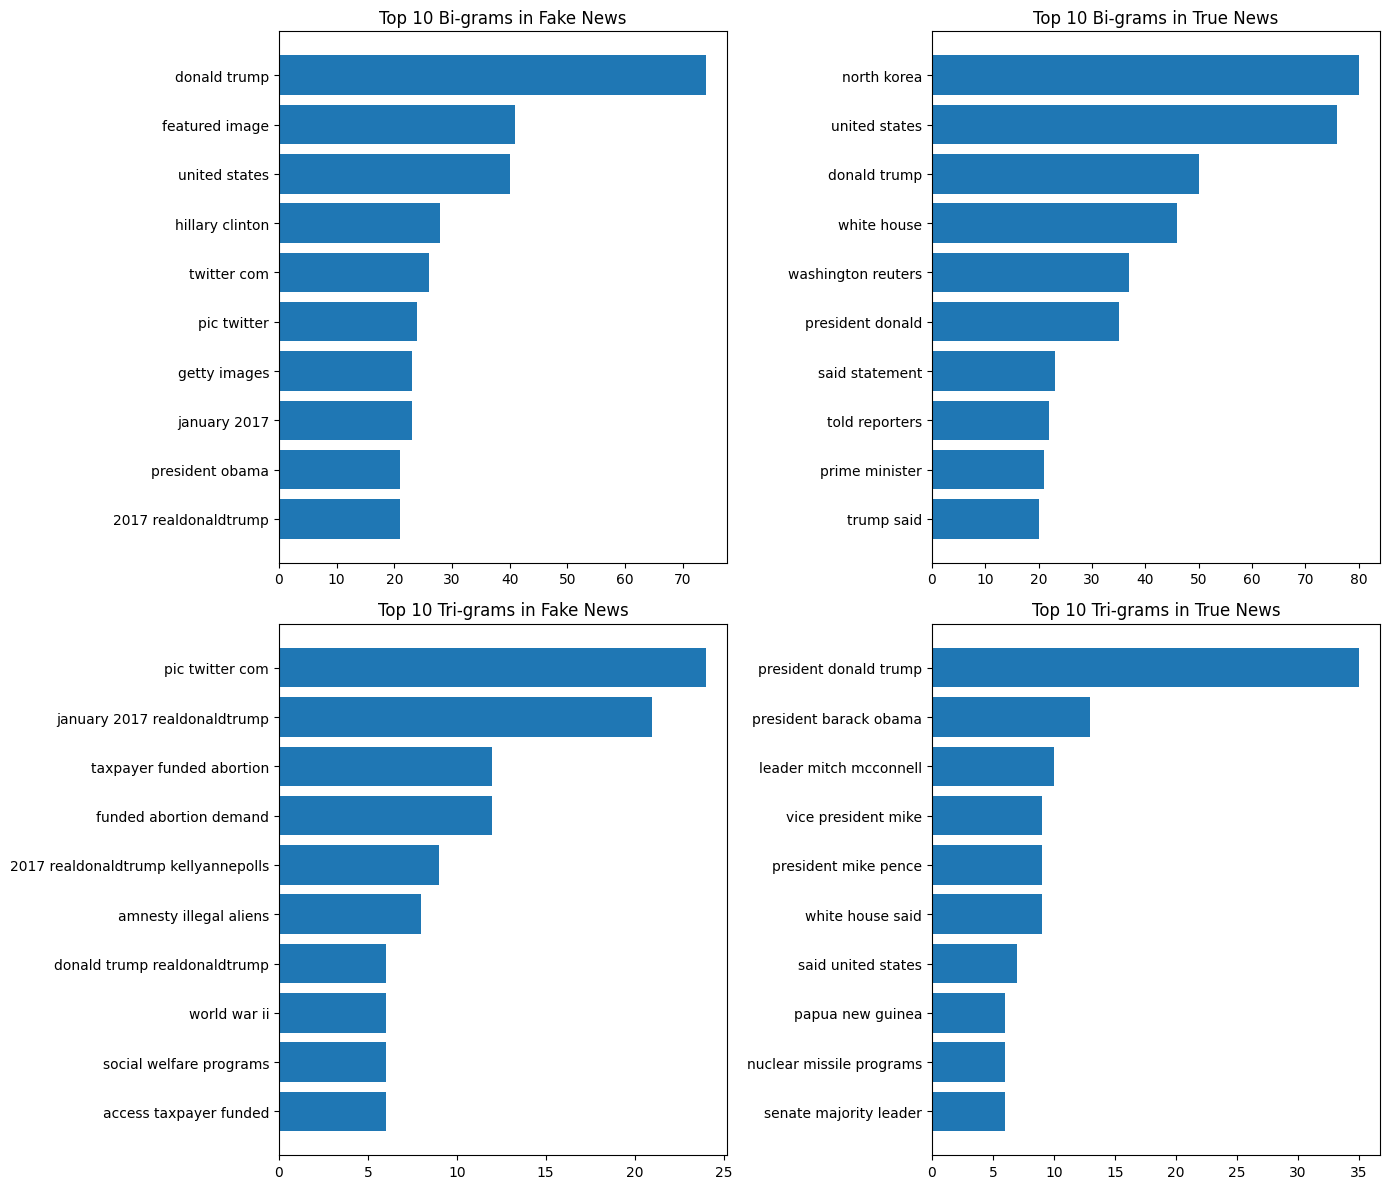

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Function to plot n-grams
def plot_ngrams(data, ax, title):
    words, freqs = zip(*data)
    ax.barh(words, freqs)
    ax.set_title(title)
    ax.invert_yaxis()  # Invert y-axis to have the highest frequencies at the top

# Plotting bi-grams for fake and true news
plot_ngrams(top_bi_grams_fake, axes[0, 0], 'Top 10 Bi-grams in Fake News')
plot_ngrams(top_bi_grams_true, axes[0, 1], 'Top 10 Bi-grams in True News')

# Plotting tri-grams for fake and true news
plot_ngrams(top_tri_grams_fake, axes[1, 0], 'Top 10 Tri-grams in Fake News')
plot_ngrams(top_tri_grams_true, axes[1, 1], 'Top 10 Tri-grams in True News')

plt.tight_layout()
plt.show()


In [119]:
# Correcting the vectorization process to ensure feature alignment between fake and true samples
# Use a common vectorizer for both fake and true news samples
vectorizer_common = CountVectorizer(stop_words='english', ngram_range=(1, 1))

# Combine texts to fit the vectorizer on all possible words
combined_texts = pd.concat([sample_fake, sample_true])
vectorizer_common.fit(combined_texts)

# Transform the samples
X_fake = vectorizer_common.transform(sample_fake)
X_true = vectorizer_common.transform(sample_true)

# Create co-occurrence matrices
Xc_fake = (X_fake.T * X_fake)
Xc_fake.setdiag(0)

Xc_true = (X_true.T * X_true)
Xc_true.setdiag(0)

# Get feature names
features_common = vectorizer_common.get_feature_names_out()

# Get the top co-occurrences again using the corrected feature set
top_co_occurrences_fake = get_top_co_occurrences(Xc_fake, features_common)
top_co_occurrences_true = get_top_co_occurrences(Xc_true, features_common)

top_co_occurrences_fake


[('group', 'group', 2),
 ('organization', 'group', 1),
 ('group', 'organization', 1),
 ('organization', 'organization', 1),
 ('america', 'group', 1),
 ('group', 'america', 1),
 ('american', 'group', 1),
 ('group', 'american', 1),
 ('trump', 'trump', 1),
 ('organization', 'america', 1)]

In [120]:
top_co_occurrences_true

[('trump', 'said', 0),
 ('said', 'trump', 1),
 ('north', 'korea', 1),
 ('korea', 'north', 1),
 ('north', 'said', 2),
 ('said', 'north', 1),
 ('republican', 'said', 3),
 ('said', 'republican', 4),
 ('said', 'president', 8),
 ('president', 'said', 1)]

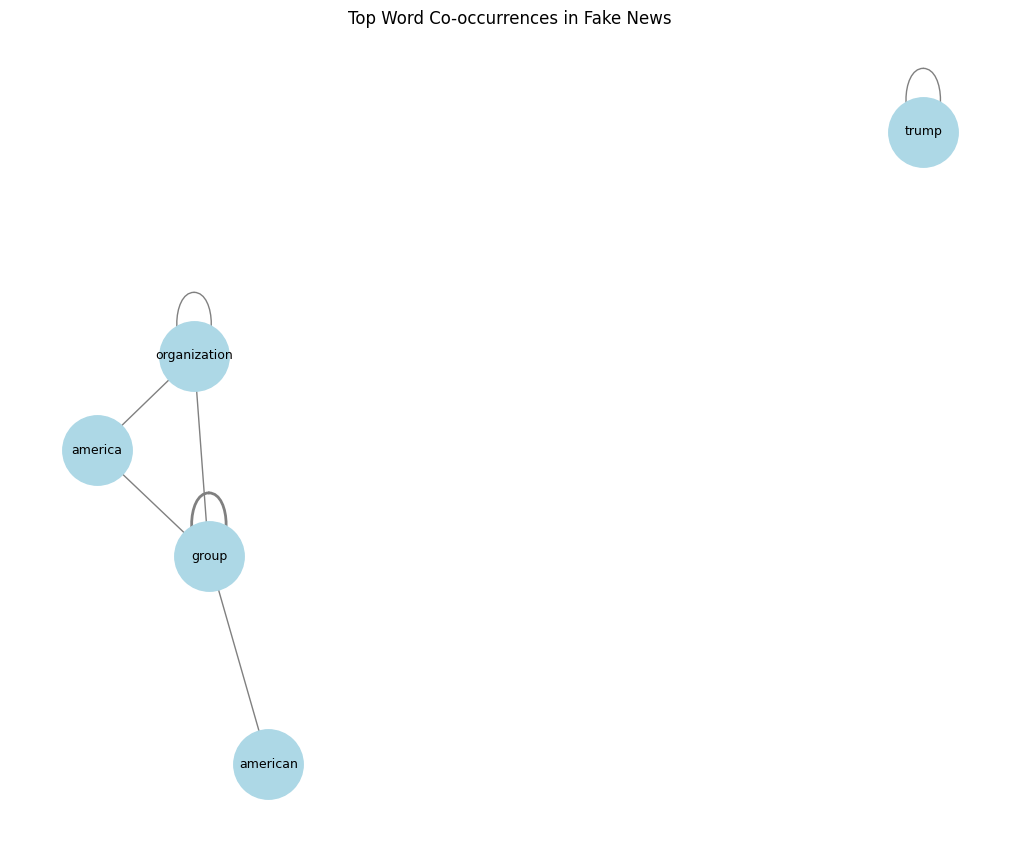

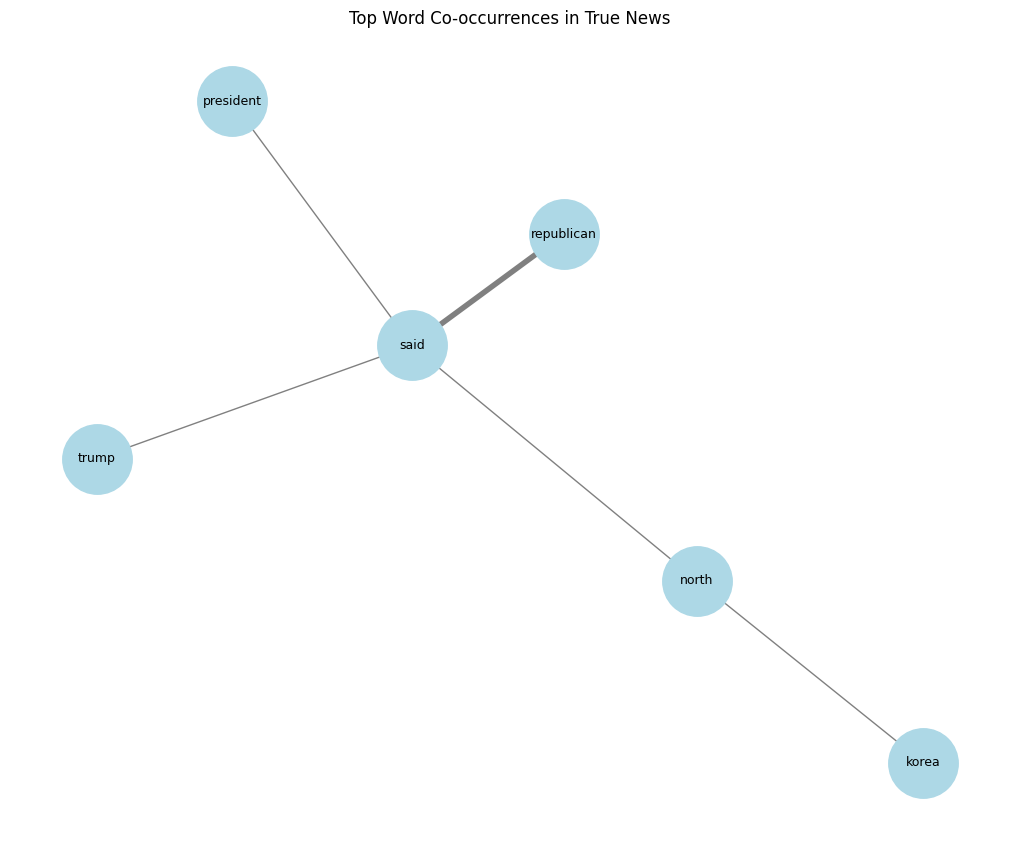

In [125]:
def plot_co_occurrence_graph(co_occurrences, title):
    G = nx.Graph()
    
    # Add edges with weights
    for word1, word2, weight in co_occurrences:
        G.add_edge(word1, word2, weight=weight)
    
    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    weights = [G[u][v]['weight'] for u,v in G.edges()]
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2500, font_size=9, width=weights)
    plt.title(title)
    plt.show()

# Plot co-occurrence graphs for fake and true news
plot_co_occurrence_graph(top_co_occurrences_fake, 'Top Word Co-occurrences in Fake News')
plot_co_occurrence_graph(top_co_occurrences_true, 'Top Word Co-occurrences in True News')
